# Algorithm 4: RANSAC

```
1. Initial: let A be a set of N points
2. repeat
3. Randomly select a sample of 2 points from A
4. Fit a line through the 2 points
5. Compute the distances of all other points to this line
6. Construct the inlier set (i.e. count the number of points with distance to the line <d) 
7. Store these inliers
8. until Maximum number of iterations k reached
9. The set with the maximum number of inliers is chosen as a solution to the problem
```

## Reference

Roland Siegwart, Illah Nourbakhsh, and Davide Scaramuzza. Introduction to Autonomous Mobile Robots. MIT Press, 2nd edition, 2011.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle
from Ransac.ransac import Ransac

In [2]:
testdata = []
for i in range(6):
    with open('/Users/hdumcke/git/lidar-simulator/jupyternb/data/testLineExtraction%s.mat.pickle' % str(i+1), 'rb') as f:
        testdata.append(pickle.load(f))

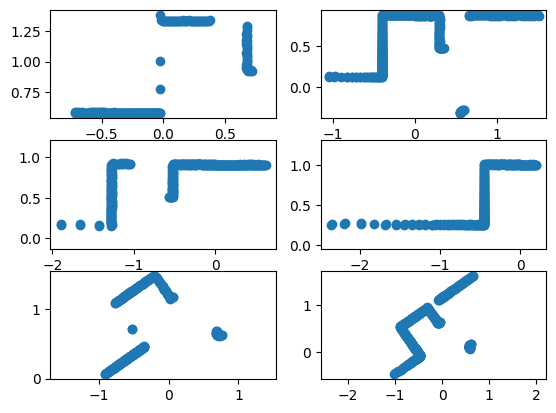

In [3]:
fig, axs = plt.subplots(3, 2)
for i in range(6):
    row_index = int(i / 2)
    column_index = i % 2
    axs[row_index, column_index].axis('equal')
    x = testdata[i]['rho'] * np.cos(testdata[i]['theta'])
    y = testdata[i]['rho'] * np.sin(testdata[i]['theta'])
    axs[row_index, column_index].scatter(x, y)

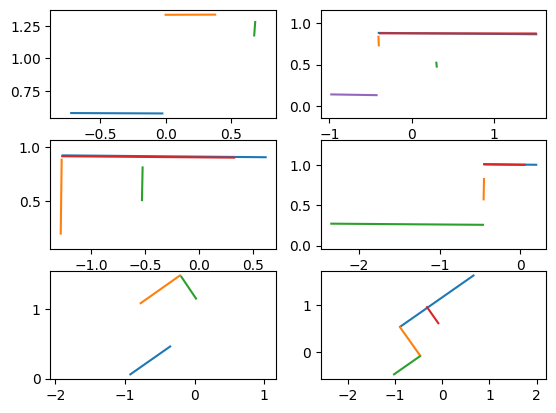

In [4]:
rs = Ransac(num_iterations=20, dist_threshold=0.005, min_points_per_segment=15)

fig, axs = plt.subplots(3, 2)
for i in range(6):
    row_index = int(i / 2)
    column_index = i % 2
    axs[row_index, column_index].axis('equal')
    x = testdata[i]['rho'] * np.cos(testdata[i]['theta'])
    y = testdata[i]['rho'] * np.sin(testdata[i]['theta'])
    segend, seglen, pointIdx_a = rs.extractLines(x[0], y[0])
    for j in range(segend.shape[0]):
        axs[row_index, column_index].plot([segend[j,0], segend[j,2]], [segend[j,1], segend[j,3]])

In [5]:
from LidarSim.lidar_sim import LidarSimulator
lidar = LidarSimulator("rectangle.stl")

In [6]:
point = [500, 300]
yaw = np.radians(0)
plot_scan = lidar.get_lidar_points(point[0], point[1], yaw)

In [7]:
# get carthesian coordinates
x = []
y = []
for alpha, r in plot_scan:
    x.append(r * np.cos(alpha)+ point[0])
    y.append(r * np.sin(alpha) + point[1])

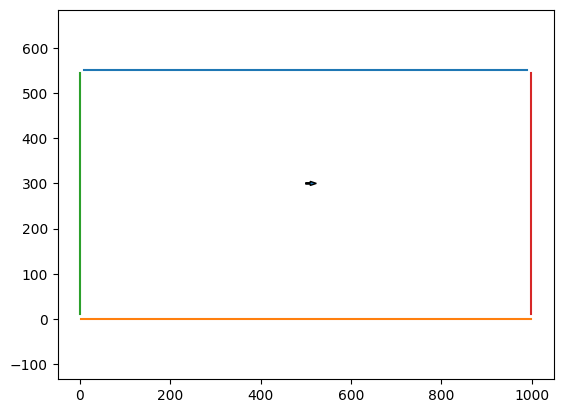

In [8]:
rs = Ransac()

fig,ax = plt.subplots()
ax.axis('equal')
plt.arrow(point[0], point[1], 10 * np.cos(yaw), 10 * np.sin(yaw), width=3.0)
#plt.scatter (x[211:329], y[211:329])
segend, seglen, pointIdx_a = rs.extractLines(x, y)
for j in range(segend.shape[0]):
    ax.plot([segend[j,0], segend[j,2]], [segend[j,1], segend[j,3]])

In [9]:
import Utilities.utilities as utilities

In [10]:
from LidarSim.lidar_sim import LidarSimulator
lidar = LidarSimulator("maze.stl")
triangles = lidar.get_map_triangles()
point = [25, 25]
yaw = np.radians(90)

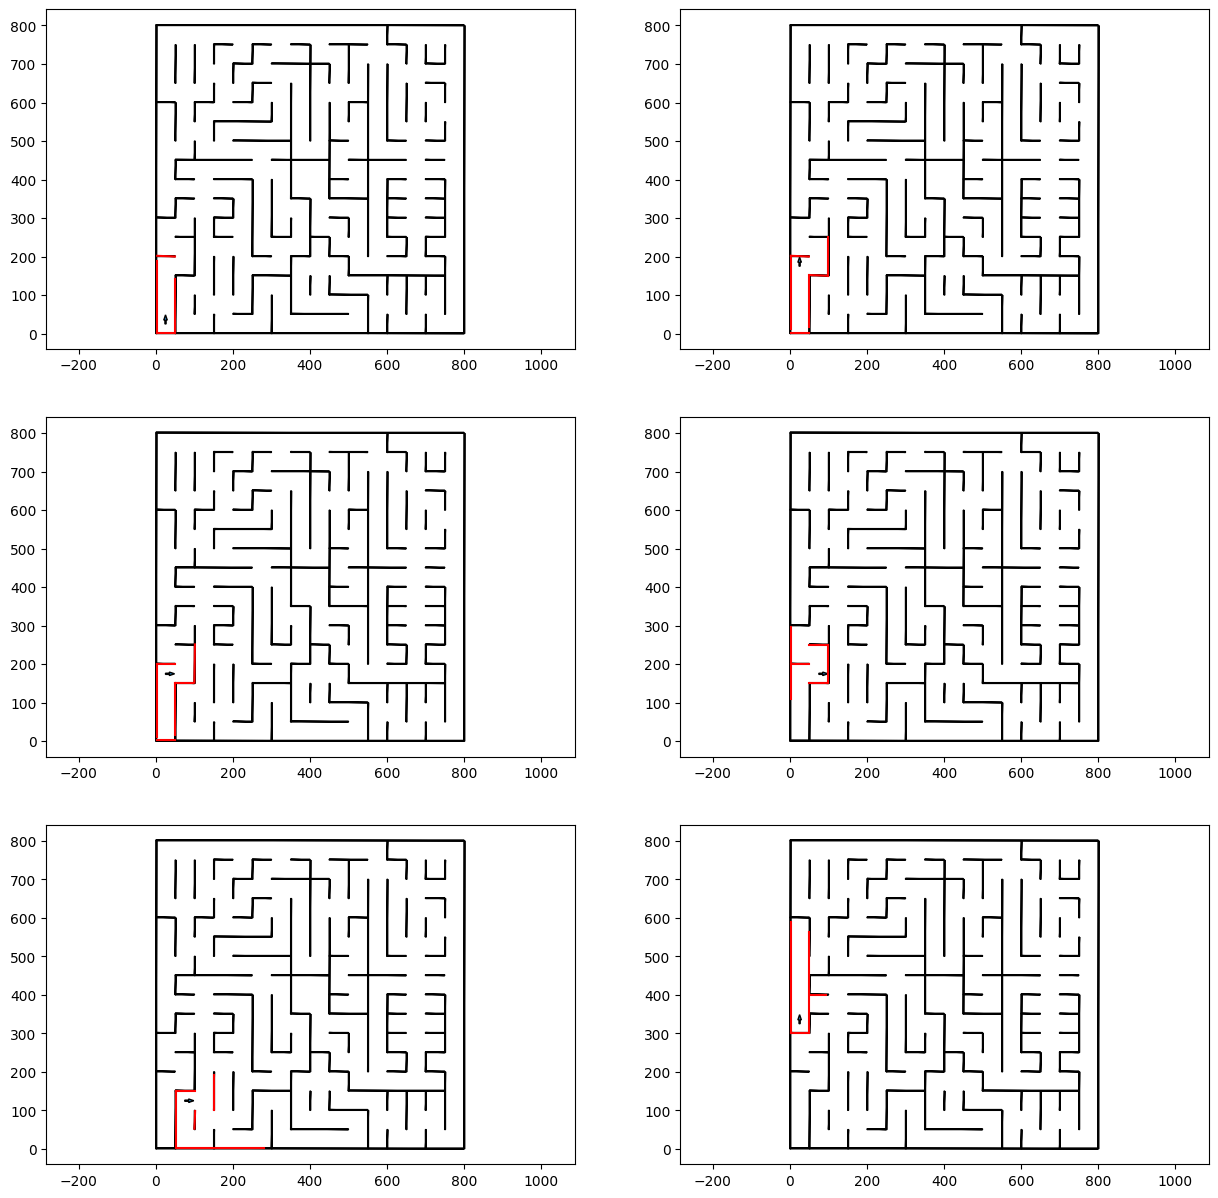

In [11]:
pose = [[25, 25, 90 ],
        [25, 175, 90 ],
        [25, 175, 0 ],
        [75, 175, 0 ],
        [75, 125, 0 ],
        [25, 325, 90 ]]

fig, axs = plt.subplots(3, 2, figsize=(15, 15))
for i in range(6):
    row_index = int(i / 2)
    column_index = i % 2
    axs[row_index, column_index].axis('equal')
    point = pose[i][0:2]
    yaw = np.radians(pose[i][2])
    plot_scan = lidar.get_lidar_points(point[0], point[1], yaw)
    # get carthesian coordinates
    x = []
    y = []
    for alpha, r in plot_scan:
        x.append(r * np.cos(alpha)+ point[0])
        y.append(r * np.sin(alpha) + point[1])
    
    rs = Ransac()

    axs[row_index, column_index].arrow(point[0], point[1], 10 * np.cos(yaw), 10 * np.sin(yaw), width=3.0)
    segend, seglen, pointIdx_a = rs.extractLines(x, y)
    for j in range(segend.shape[0]):
        x_p, y_p = utilities.rotate_segend(segend[j], point, yaw)
        axs[row_index, column_index].plot(x_p, y_p, 'r')
    for t in triangles:
        axs[row_index, column_index].fill(t[:, 0],t[:, 1],fill=False)

In [12]:
from LidarSim.lidar_sim import LidarSimulator
lidar = LidarSimulator("racetrack.stl")
triangles = lidar.get_map_triangles()
yaw = np.radians(180)

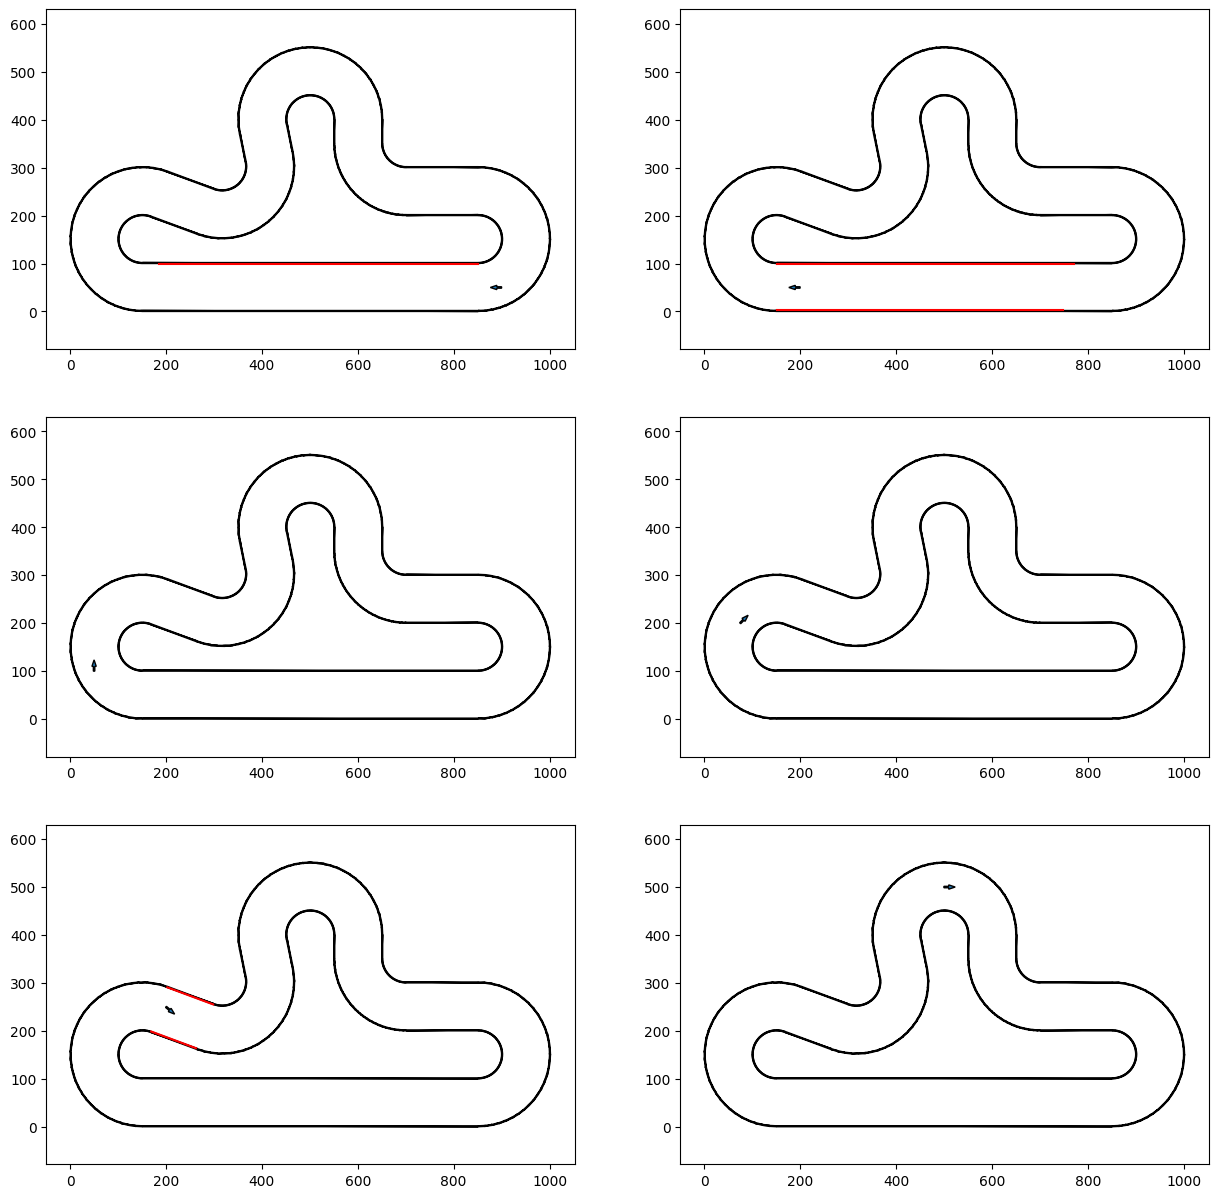

In [13]:
pose = [[900, 50, 180 ],
        [200, 50, 180 ],
        [50, 100, 90 ],
        [75, 200, 45 ],
        [200, 250, -40 ],
        [500, 500, 0 ]]

fig, axs = plt.subplots(3, 2, figsize=(15, 15))
for i in range(6):
    row_index = int(i / 2)
    column_index = i % 2
    axs[row_index, column_index].axis('equal')
    point = pose[i][0:2]
    yaw = np.radians(pose[i][2])
    plot_scan = lidar.get_lidar_points(point[0], point[1], yaw)
    # get carthesian coordinates
    x = []
    y = []
    for alpha, r in plot_scan:
        x.append(r * np.cos(alpha)+ point[0])
        y.append(r * np.sin(alpha) + point[1])
    
    rs = Ransac()

    axs[row_index, column_index].arrow(point[0], point[1], 10 * np.cos(yaw), 10 * np.sin(yaw), width=3.0)
    segend, seglen, pointIdx_a = rs.extractLines(x, y)
    for j in range(segend.shape[0]):
        x_p, y_p = utilities.rotate_segend(segend[j], point, yaw)
        axs[row_index, column_index].plot(x_p, y_p, 'r')
    for t in triangles:
        axs[row_index, column_index].fill(t[:, 0],t[:, 1],fill=False)

## Issues with Ransac

Ransac finds infinite lines. If two segments are on the same line they are considered the same as we can see with the maze example

Ransac is also non deterministic due to the random sample selection. Run the examples several times to see the changes